In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

import segmentation_models_pytorch as smp
import timm

/home/pedke/multi-task-learning/pedke-venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
mask_path = "/home/pedke/dataset/datasets/19-April-23_split - no_special_chars/train/masks/_1140382_glans.JPG"
mask = torch.tensor(np.array(ImageOps.exif_transpose(Image.open(mask_path)).convert("L")))
mask.shape

torch.Size([2561, 2367])

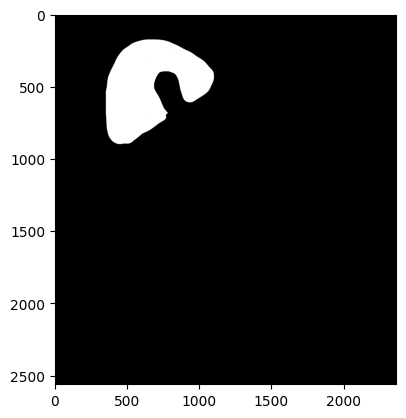

In [15]:
plt.imshow(mask, cmap='gray')

In [19]:
mask = mask.unsqueeze(0).unsqueeze(0)
mask.shape

torch.Size([1, 1, 2561, 2367])

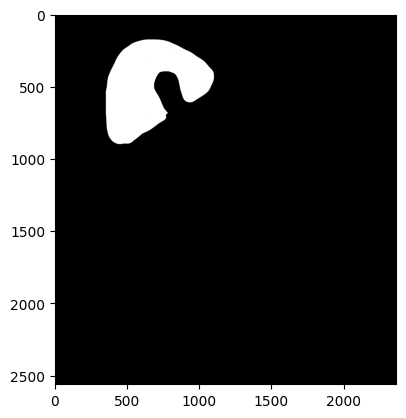

In [28]:
plt.imshow(mask.squeeze(0).squeeze(0), cmap='gray')

In [29]:
torchvision.utils.save_image(mask.float(), "/home/pedke/multi-task-learning/unsqueezed.png")
torchvision.utils.save_image(mask.squeeze(0).squeeze(0).float(), "/home/pedke/multi-task-learning/squeezed.png")

In [3]:
ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=3, 
    activation=ACTIVATION,
)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/pedke/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 189MB/s] 


In [4]:
model

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [13]:
model.encoder.layer1

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [14]:
from torchsummary import summary

In [15]:
model = model.cuda()

In [16]:
summary(model, input_size = (3, 64, 64), batch_size = -1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]           4,096
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]          16,384
      BatchNorm2d-12          [-1, 256, 16, 16]             512
           Conv2d-13          [-1, 256, 16, 16]          16,384
      BatchNorm2d-14          [-1, 256,

In [3]:
from backbones_unet.model.unet import Unet
import backbones_unet

In [4]:
print(backbones_unet.__available_models__)

['convnext_atto', 'convnext_atto_ols', 'convnext_base', 'convnext_base_384_in22ft1k', 'convnext_base_in22ft1k', 'convnext_base_in22k', 'convnext_femto', 'convnext_femto_ols', 'convnext_large', 'convnext_large_384_in22ft1k', 'convnext_large_in22ft1k', 'convnext_large_in22k', 'convnext_nano', 'convnext_nano_ols', 'convnext_pico', 'convnext_pico_ols', 'convnext_small', 'convnext_small_384_in22ft1k', 'convnext_small_in22ft1k', 'convnext_small_in22k', 'convnext_tiny', 'convnext_tiny_384_in22ft1k', 'convnext_tiny_hnf', 'convnext_tiny_in22ft1k', 'convnext_tiny_in22k', 'convnext_xlarge_384_in22ft1k', 'convnext_xlarge_in22ft1k', 'convnext_xlarge_in22k', 'cs3darknet_focus_l', 'cs3darknet_focus_m', 'cs3darknet_l', 'cs3darknet_m', 'cs3darknet_x', 'cs3edgenet_x', 'cs3se_edgenet_x', 'cs3sedarknet_l', 'cs3sedarknet_x', 'cspdarknet53', 'cspresnet50', 'cspresnext50', 'darknet53', 'darknetaa53', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'densenetblur121d', 'dm_nfnet_f0', 'dm_nfnet_f1',

In [5]:
model = Unet(
    backbone='resnet18', # backbone network name
    in_channels=3,            # input channels (1 for gray-scale images, 3 for RGB, etc.)
    num_classes=3,            # output channels (number of classes in your dataset)
)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/pedke/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [6]:
model

Unet(
  (encoder): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=

In [3]:
score_df = pd.read_excel("/home/pedke/dataset/datasheets/FINAL Copy of Classification - no_special_chars.xlsx",skiprows=1)
score_df.rename(columns={score_df.columns[0]: "Image Name"}, inplace=True)
score_df.drop(score_df.columns[[1, 18]], axis=1, inplace=True)

In [59]:
img_name = 'Excellent urethral plate (Intact prepuce circumcised)'
temp = {'Excellent urethral plate (Intact prepuce circumcised)': 'Excellent urethral plate'}
if img_name in temp.keys():
    img_name = temp[img_name]

In [60]:
img_name

'Excellent urethral plate'

In [61]:
s = score_df.stack().str.contains(img_name, na=False)

In [63]:
img_row = score_df.iloc[[s[s].index[0][0]]]
img_row

,Image Name,Glans 1,Glans 2,Glans 3,Glans Concensus,Meatus 1,Meatus 2,Meatus 3,Meatus Concensus,Urethral Plate 1,...,Shape of skin 3,Shape of skin Concensus,Torsion,Torsion 1,Torsion 2,Torsion Concensus,Curvature,Curvature 1,Curvature 2,Curvature Concensus
272,Excellent urethral plate (Intact prepuce circu...,2,2,2,NaN,3.0,3.0,2.0,3.0,2.0,...,2.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN


In [31]:
img_row

,Image Name,Glans 1,Glans 2,Glans 3,Glans Concensus,Meatus 1,Meatus 2,Meatus 3,Meatus Concensus,Urethral Plate 1,...,Shape of skin 3,Shape of skin Concensus,Torsion,Torsion 1,Torsion 2,Torsion Concensus,Curvature,Curvature 1,Curvature 2,Curvature Concensus
124,Case for long TIP.JPG,1,2,1,1.0,4.0,4.0,4.0,NaN,3.0,...,3.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN


In [15]:
img_row

,Image Name,Glans 1,Glans 2,Glans 3,Glans Concensus,Meatus 1,Meatus 2,Meatus 3,Meatus Concensus,Urethral Plate 1,...,Shape of skin 3,Shape of skin Concensus,Torsion,Torsion 1,Torsion 2,Torsion Concensus,Curvature,Curvature 1,Curvature 2,Curvature Concensus
0,_1140382.JPG,4,4,4,NaN,4.0,4.0,4.0,NaN,3.0,...,4.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN


In [3]:
model_name = 'resnet50'
model = timm.create_model(model_name, pretrained=True, num_classes=4)
model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [11]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

img_path ='/home/pedke/dataset/datasets/15-October-23_split - no_special_chars/train/images/_1140382.JPG'

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
input_tensor = torch.Tensor(np.asarray(ImageOps.exif_transpose(Image.open(img_path)).convert("RGB")))
print(input_tensor.size())
input_tensor = torch.unsqueeze(torch.permute(input_tensor, (2, 0, 1)), 0)

# Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

targets = [ClassifierOutputTarget(281)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

torch.Size([2561, 2367, 3])


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 10.76 GiB total capacity; 8.68 GiB already allocated; 8.44 MiB free; 8.74 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF